
___
# Recommender Systems with Python


## Import Libraries

In [1]:
import numpy as np
import pandas as pd

## Import Dataset

In [2]:
from google.colab import files
files.upload()

Saving Movie_Id.dat to Movie_Id.dat
Saving User_dataset.dat to User_dataset.dat


{'Movie_Id.dat': b'item_id,title\n1,Toy Story (1995)\n2,GoldenEye (1995)\n3,Four Rooms (1995)\n4,Get Shorty (1995)\n5,Copycat (1995)\n6,Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)\n7,Twelve Monkeys (1995)\n8,Babe (1995)\n9,Dead Man Walking (1995)\n10,Richard III (1995)\n11,Seven (Se7en) (1995)\n12,"Usual Suspects, The (1995)"\n13,Mighty Aphrodite (1995)\n14,"Postino, Il (1994)"\n15,Mr. Holland\'s Opus (1995)\n16,French Twist (Gazon maudit) (1995)\n17,From Dusk Till Dawn (1996)\n18,"White Balloon, The (1995)"\n19,Antonia\'s Line (1995)\n20,Angels and Insects (1995)\n21,Muppet Treasure Island (1996)\n22,Braveheart (1995)\n23,Taxi Driver (1976)\n24,Rumble in the Bronx (1995)\n25,"Birdcage, The (1996)"\n26,"Brothers McMullen, The (1995)"\n27,Bad Boys (1995)\n28,Apollo 13 (1995)\n29,Batman Forever (1995)\n30,Belle de jour (1967)\n31,Crimson Tide (1995)\n32,Crumb (1994)\n33,Desperado (1995)\n34,"Doom Generation, The (1995)"\n35,Free Willy 2: The Adventure Home (1995)\n36,Mad Love (1

## Get the Data

In [4]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('User_dataset.dat', sep='\t', names=column_names)

In [ ]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


Now let's get the movie titles:

In [6]:
movie_titles = pd.read_csv("Movie_Id.dat")
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


Merge them together:

In [7]:
df = pd.merge(df,movie_titles,on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50.0,5.0,881250949.0,Star Wars (1977)
1,290,50.0,5.0,880473582.0,Star Wars (1977)
2,79,50.0,4.0,891271545.0,Star Wars (1977)
3,2,50.0,5.0,888552084.0,Star Wars (1977)
4,8,50.0,5.0,879362124.0,Star Wars (1977)


# Exploritory Data Analysis

``Exploring the data.``

``Finding different patterns through visuals.``

``Get a look at some of the best rated movies.``

## Visualization Imports

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Let's create a ratings dataframe with average rating and number of ratings:

In [9]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Prefontaine (1997)                 5.0
Aiqing wansui (1994)               5.0
Great Day in Harlem, A (1994)      5.0
Letter From Death Row, A (1998)    5.0
Santa with Muscles (1996)          5.0
Name: rating, dtype: float64

In [10]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Fargo (1996)        158
Star Wars (1977)    156
Contact (1997)      152
Scream (1996)       142
Liar Liar (1997)    133
Name: rating, dtype: int64

In [11]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),1.666667
1-900 (1994),2.500000
101 Dalmatians (1996),3.000000
12 Angry Men (1957),4.379310
187 (1997),2.200000


Now set the number of ratings column:

In [12]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),1.666667,3
1-900 (1994),2.500000,2
101 Dalmatians (1996),3.000000,31
12 Angry Men (1957),4.379310,29
187 (1997),2.200000,5


Now a few histograms:

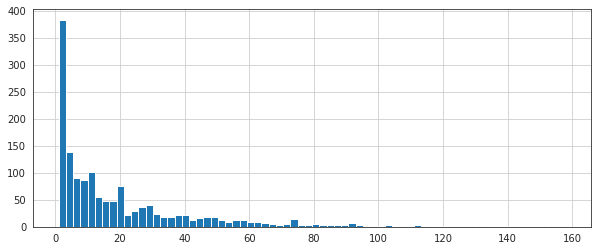

In [13]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=70)

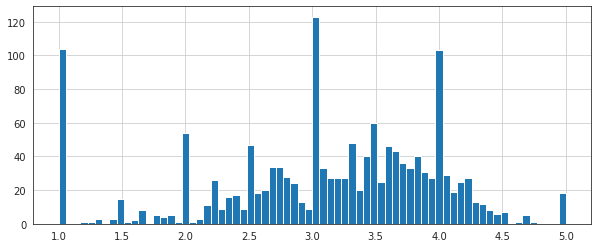

In [14]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

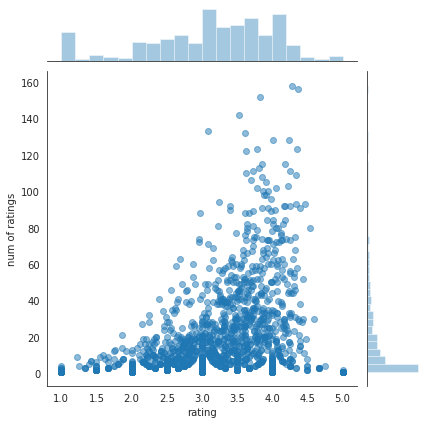

In [15]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

Okay! Now that we have a general idea of what the data looks like, let's move on to creating a simple recommendation system:

## Recommending Similar Movies

1. Create a matrix that has the user ids on one access and the movie title on another axis. 
2. Each cell will then consist of the rating the user gave to that movie. 

``Note there will be a lot of NaN values, because most people have not seen most of the movies.``

In [16]:
moviemat = df.pivot_table(index='user_id',columns='title',values='rating')
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",8 1/2 (1963),8 Seconds (1994),Absolute Power (1997),"Abyss, The (1989)",Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),Across the Sea of Time (1995),Addams Family Values (1993),Addicted to Love (1997),"Addiction, The (1995)","Adventures of Pinocchio, The (1996)","Adventures of Priscilla, Queen of the Desert, The (1994)","Adventures of Robin Hood, The (1938)","Affair to Remember, An (1957)","African Queen, The (1951)",Afterglow (1997),"Age of Innocence, The (1993)",Aiqing wansui (1994),Air Bud (1997),Air Force One (1997),"Air Up There, The (1994)",Airheads (1994),Akira (1988),Aladdin (1992),Aladdin and the King of Thieves (1996),Alaska (1996),Albino Alligator (1996),Alice in Wonderland (1951),Alien (1979),Alien 3 (1992),...,When Night Is Falling (1995),When We Were Kings (1996),When a Man Loves a Woman (1994),When the Cats Away (Chacun cherche son chat) (1996),While You Were Sleeping (1995),"White Balloon, The (1995)",White Man's Burden (1995),White Squall (1996),"Whole Wide World, The (1996)",Widows' Peak (1994),Wild America (1997),Wild Bill (1995),"Wild Bunch, The (1969)",Wild Things (1998),William Shakespeare's Romeo and Juliet (1996),Willy Wonka and the Chocolate Factory (1971),Window to Paris (1994),Wings of Desire (1987),"Wings of the Dove, The (1997)",Winnie the Pooh and the Blustery Day (1968),"Winter Guest, The (1997)",Wishmaster (1997),With Honors (1994),Withnail and I (1987),"Wizard of Oz, The (1939)",Wolf (1994),"Women, The (1939)","Wonderful, Horrible Life of Leni Riefenstahl, The (1993)",Wonderland (1997),"World of Apu, The (Apur Sansar) (1959)","Wrong Trousers, The (1993)",Wyatt Earp (1994),Yankee Zulu (1994),Year of the Horse (1997),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,NaN,NaN,NaN,3.0,4.0,NaN,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Most rated movie:

In [17]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
title,,
Fargo (1996),4.284810,158
Star Wars (1977),4.358974,156
Contact (1997),3.828947,152
Scream (1996),3.528169,142
Liar Liar (1997),3.082707,133
"English Patient, The (1996)",3.606061,132
Return of the Jedi (1983),4.007812,128
Pulp Fiction (1994),4.234375,128
"Silence of the Lambs, The (1991)",4.349593,123


Let's choose two movies: starwars, a sci-fi movie. And Liar Liar, a comedy.

In [18]:
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),1.666667,3
1-900 (1994),2.500000,2
101 Dalmatians (1996),3.000000,31
12 Angry Men (1957),4.379310,29
187 (1997),2.200000,5


Now let's grab the user ratings for those two movies:

In [19]:
starwars_user_ratings = moviemat['Star Wars (1977)']
liarliar_user_ratings = moviemat['Liar Liar (1997)']
starwars_user_ratings.head()

user_id
0    5.0
1    NaN
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

We can then use corrwith() method to get correlations between two pandas series:

In [20]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings)

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Let's clean this by removing NaN values and using a DataFrame instead of a series:

In [21]:
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars.dropna(inplace=True)
corr_starwars.head()

,Correlation
title,
101 Dalmatians (1996),0.599173
12 Angry Men (1957),0.308158
2 Days in the Valley (1996),-0.100402
"20,000 Leagues Under the Sea (1954)",0.310253
2001: A Space Odyssey (1968),0.574853


Now if we sort the dataframe by correlation, we should get the most similar movies, however note that we get some results that don't really make sense. This is because there are a lot of movies only watched once by users who also watched star wars (it was the most popular movie). 

In [22]:
corr_starwars.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
"Portrait of a Lady, The (1996)",1.0
Kama Sutra: A Tale of Love (1996),1.0
"Replacement Killers, The (1998)",1.0
Addicted to Love (1997),1.0
"Awfully Big Adventure, An (1995)",1.0
Cronos (1992),1.0
Blue Sky (1994),1.0
"War Room, The (1993)",1.0
House Arrest (1996),1.0


Let's fix this by filtering out movies that have less than 100 reviews (this value was chosen based off the histogram from earlier).

In [23]:
corr_starwars = corr_starwars.join(ratings['num of ratings'])
corr_starwars.head()

,Correlation,num of ratings
title,,
101 Dalmatians (1996),0.599173,31
12 Angry Men (1957),0.308158,29
2 Days in the Valley (1996),-0.100402,22
"20,000 Leagues Under the Sea (1954)",0.310253,17
2001: A Space Odyssey (1968),0.574853,82


Now sort the values and notice how the titles make a lot more sense:

In [24]:
corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,156
"Empire Strikes Back, The (1980)",0.777745,103
Return of the Jedi (1983),0.618113,128
Raiders of the Lost Ark (1981),0.558456,111
Star Trek: First Contact (1996),0.552106,106


Now the same for the comedy Liar Liar:

In [25]:
corr_liarliar = pd.DataFrame(similar_to_liarliar,columns=['Correlation'])
corr_liarliar.dropna(inplace=True)
corr_liarliar = corr_liarliar.join(ratings['num of ratings'])
corr_liarliar[corr_liarliar['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Liar Liar (1997),1.000000,133
Toy Story (1995),0.498923,113
Raiders of the Lost Ark (1981),0.409638,111
"Empire Strikes Back, The (1980)",0.301540,103
"Rock, The (1996)",0.275182,111
